In [1]:
import pandas as pd

COLS = ["id", "lat", "long", "text"]
df_train = pd.read_csv("../data/training.txt", names=COLS)
df_val = pd.read_csv("../data/validation.txt", names=COLS)

df_train.head()

,id,lat,long,text
0,119165,51.810067,10.191331,"Seit d Vase: ""Wenn ich kaputt gang, bringt das..."
1,100377,51.918188,10.599245,Haha bin au w isch der amig au so richtig lang...
2,109550,52.711074,9.987374,isch d hiltl dachterrasse amne samstig viel bs...
3,111440,52.386711,11.700612,Ich fühle mich wie die Weimarer Republik... .....
4,116670,52.314631,9.701835,Eui liebschte Lunchidee zum Mitneh? 😬 En Grill...


In [8]:
df_train.text[1]

'Haha bin au w isch der amig au so richtig langwilig?😂 Was bisch denn du? 😂 Aso m oder w meini😂 @1 meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich 😂 Wend mer zeme iwo anderst chli schribe Ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde😂😂 @1 und susch hesch kik? Oder so 2 ischen cop I guarantee it @4 polizist oder was? @2 bini z alt für dich @1 hahah musch du wüsse Hesch mer dini nummere ? @1 nummere... Hesch kei kik? @3 ja das heisst?😂'

In [3]:
from emoji import demojize

def replace_emoji(text):
    return demojize(text, delimiters=(" :", ": "))


In [15]:
example = replace_emoji(df_train.text[1]).lower()
example

'haha bin au w isch der amig au so richtig langwilig? :face_with_tears_of_joy:  was bisch denn du?  :face_with_tears_of_joy:  aso m oder w meini :face_with_tears_of_joy:  @1 meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich  :face_with_tears_of_joy:  wend mer zeme iwo anderst chli schribe ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde :face_with_tears_of_joy:  :face_with_tears_of_joy:  @1 und susch hesch kik? oder so 2 ischen cop i guarantee it @4 polizist oder was? @2 bini z alt für dich @1 hahah musch du wüsse hesch mer dini nummere ? @1 nummere... hesch kei kik? @3 ja das heisst? :face_with_tears_of_joy: '

In [14]:
import re

def replace_user_handles(text):
    return re.sub(r"@[^\s]+", " :user_handle: ", text)

In [16]:
example = replace_user_handles(example)
example

'haha bin au w isch der amig au so richtig langwilig? :face_with_tears_of_joy:  was bisch denn du?  :face_with_tears_of_joy:  aso m oder w meini :face_with_tears_of_joy:   :user_handle:  meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich  :face_with_tears_of_joy:  wend mer zeme iwo anderst chli schribe ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde :face_with_tears_of_joy:  :face_with_tears_of_joy:   :user_handle:  und susch hesch kik? oder so 2 ischen cop i guarantee it  :user_handle:  polizist oder was?  :user_handle:  bini z alt für dich  :user_handle:  hahah musch du wüsse hesch mer dini nummere ?  :user_handle:  nummere... hesch kei kik?  :user_handle:  ja das heisst? :face_with_tears_of_joy: '

In [17]:
def remove_symbols(text):
    text = re.sub(r"[^a-zA-Zäöüß:_#]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

In [18]:
example = remove_symbols(example)
example

'haha bin au w isch der amig au so richtig langwilig :face_with_tears_of_joy: was bisch denn du :face_with_tears_of_joy: aso m oder w meini :face_with_tears_of_joy: :user_handle: meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich :face_with_tears_of_joy: wend mer zeme iwo anderst chli schribe ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde :face_with_tears_of_joy: :face_with_tears_of_joy: :user_handle: und susch hesch kik oder so ischen cop i guarantee it :user_handle: polizist oder was :user_handle: bini z alt für dich :user_handle: hahah musch du wüsse hesch mer dini nummere :user_handle: nummere hesch kei kik :user_handle: ja das heisst :face_with_tears_of_joy:'

In [27]:
def clean(text):
    text = text.lower()
    text = demojize(text, delimiters=(" :", ": "))
    text = re.sub(r"@[^\s]+", " :user_handle: ", text)
    text = re.sub(r"https?://[^ ]+", " :url: ", text)
    text = re.sub(r"www.[^ ]+", " :url: ", text)
    text = re.sub(r"[^a-zA-Zäöüß:_#]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

In [28]:
print(df_train.text[1] + "\n")
print(clean(df_train.text[1]))


Haha bin au w isch der amig au so richtig langwilig?😂 Was bisch denn du? 😂 Aso m oder w meini😂 @1 meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich 😂 Wend mer zeme iwo anderst chli schribe Ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde😂😂 @1 und susch hesch kik? Oder so 2 ischen cop I guarantee it @4 polizist oder was? @2 bini z alt für dich @1 hahah musch du wüsse Hesch mer dini nummere ? @1 nummere... Hesch kei kik? @3 ja das heisst?😂

haha bin au w isch der amig au so richtig langwilig :face_with_tears_of_joy: was bisch denn du :face_with_tears_of_joy: aso m oder w meini :face_with_tears_of_joy: :user_handle: meini eig sry han irgendwie ned päcct das ich s zwei bin aso alli mini nachrichte sind a dich :face_with_tears_of_joy: wend mer zeme iwo anderst chli schribe ja chömer verschrick eif ned bin noni so alt aso wenns der ned passt chasch di ja ez melde :face_with_tears_of_joy: :face_with_tears_of

In [29]:
print(df_train.text[18412] + "\n")
print(clean(df_train.text[18412]))


het eini lust chli schriebe? 😬 du kasch offebar nid schribe 😂😂 Ja 079 9000000 du bisch grusig #oldbutgold @2 isch e 0 z'viel

het eini lust chli schriebe :grimacing_face: du kasch offebar nid schribe :face_with_tears_of_joy: :face_with_tears_of_joy: ja du bisch grusig #oldbutgold :user_handle: isch e z viel


In [30]:
print(df_train.text[4351] + "\n")
print(clean(df_train.text[4351]))


De Tod vom Chester Bennington zieht mich gat chli abe, chan mich öbbert chli ufheitere? Liegt der Bauer auf der Magd, dann hat wohl seine Frau versagt. ...wennd schlecht druff bisch denk drah, dadusse giz fraue wo bi rege kei augebraue me hend... https://youtu.be/5WVVyAhbX60 Chunsch no ufes bier Toll en random ma stirbt und dir gahts scheisse... gg Ich han dini muetter gschwängert Gruess din vater

de tod vom chester bennington zieht mich gat chli abe chan mich öbbert chli ufheitere liegt der bauer auf der magd dann hat wohl seine frau versagt wennd schlecht druff bisch denk drah dadusse giz fraue wo bi rege kei augebraue me hend :url: chunsch no ufes bier toll en random ma stirbt und dir gahts scheisse gg ich han dini muetter gschwängert gruess din vater


(array([6.900e+01, 6.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.200e+01, 6.700e+01,
        0.000e+00, 1.000e+01, 0.000e+00, 0.000e+00, 5.230e+02, 5.100e+02,
        7.300e+01, 3.530e+02, 6.830e+02, 6.000e+01, 1.599e+03, 1.400e+01,
        1.600e+01, 5.730e+02, 1.017e+03, 1.940e+02, 3.260e+02, 3.010e+02,
        1.574e+03, 6.770e+02, 1.850e+02, 1.637e+03, 1.176e+03, 1.450e+02,
        2.151e+03, 8.670e+02, 7.170e+02, 6.990e+02, 2.117e+03, 1.952e+03,
        6.330e+02, 1.171e+03, 1.260e+02, 2.000e+00, 0.000e+00, 3.700e+01,
        2.240e+02, 5.000e+00]),
 array([48.17  , 48.2774, 48.3848, 48.4922, 48.5996, 48.707 , 48.8144,
        48.9218, 49.0292, 49.1366, 49.244 , 49.3514, 49.4588, 49.5662,
        49.6736, 49.781 , 49.8884, 49.9958, 50.1032, 50.2106, 50.318 ,
        50.4254, 50.5328, 50.6402, 50.7476, 50.855 , 50.9624, 51.0698,
        51.1772, 51.2846, 51.392 , 51.4994, 51.6068, 51.7142, 51.8216,
        51.929 , 52.0

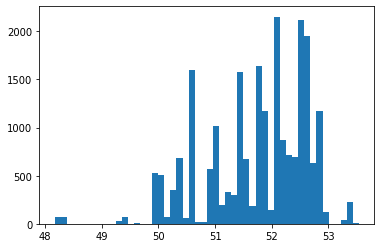